# Introduction/Business Problem

Are you a driver? Do you know how to drive? If yes, I ensure face this problem before such as you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. It is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital.They must be in critical condition for all this to be happening.

So I am going to predict the severity of an accident based on weather, road conditons and light conditions. It can warn you before by given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.

# Data Section

I will use the data that provided by the course to predict the severity of an accident based on weather, road conditons and light conditions. I will build a machine learning model to predict the possibility of you getting into a car accident and how severe it would be. For example, if the weather is overcast, the road codition is wet and the light condition is daylight how many probability will you getting into a car accident and it is severtiy being either "Property damage only" or "Injury Collision"? It can be found by using the machine learning model to predict it.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [3]:

!wget -O collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-03 09:33:01--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘collisions.csv’

100%[======================================>] 73,917,638  35.8MB/s   in 2.0s   

2020-09-03 09:33:04 (35.8 MB/s) - ‘collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv('collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

In [7]:
dfSev = df['SEVERITYDESC'].value_counts()
dfSev

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

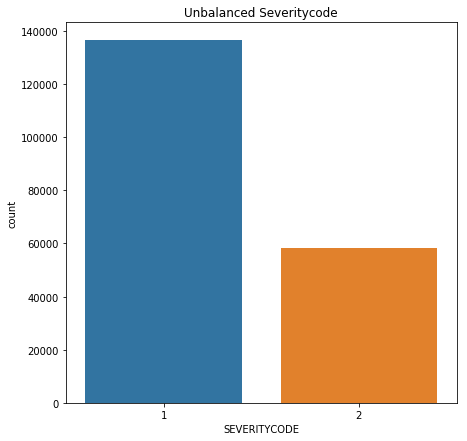

In [13]:
plt.figure(figsize=(7,7))
sns.countplot('SEVERITYCODE',data=df)
plt.title('Unbalanced Severitycode')
plt.show()

In [16]:
shuffled_df = df.sample(frac=1,random_state=2)

In [17]:
sv2_df = shuffled_df.loc[shuffled_df['SEVERITYCODE']==2]

In [18]:
sv1_df = shuffled_df.loc[shuffled_df['SEVERITYCODE']==1].sample(n=58188,random_state=55)

In [19]:
normalized_df = pd.concat([sv2_df,sv1_df])

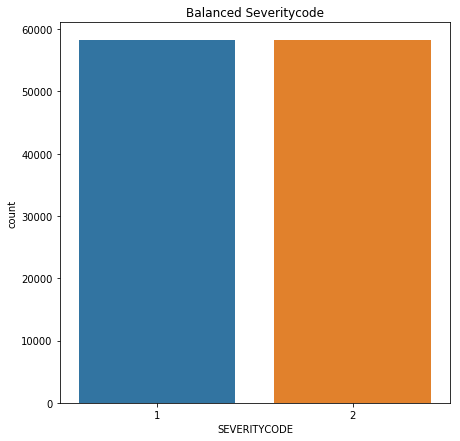

In [20]:
plt.figure(figsize=(7,7))
sns.countplot('SEVERITYCODE',data=normalized_df)
plt.title('Balanced Severitycode')
plt.show()

In [21]:
normalized_df['WEATHER'].value_counts()

Clear                       68059
Raining                     20534
Overcast                    16808
Unknown                      6812
Snowing                       457
Other                         421
Fog/Smog/Smoke                357
Sleet/Hail/Freezing Rain       68
Blowing Sand/Dirt              30
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [22]:
normalized_df['ROADCOND'].value_counts()

Dry               76221
Wet               29229
Unknown            6768
Ice                 635
Snow/Slush          514
Other                88
Standing Water       70
Sand/Mud/Dirt        43
Oil                  42
Name: ROADCOND, dtype: int64

In [23]:
normalized_df['LIGHTCOND'].value_counts()

Daylight                    71611
Dark - Street Lights On     29055
Unknown                      6055
Dusk                         3586
Dawn                         1563
Dark - No Street Lights       848
Dark - Street Lights Off      675
Other                         127
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

In [24]:
new_df = normalized_df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
new_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
21837,2,Clear,Dry,Dusk
10066,2,Clear,Dry,Unknown
102962,2,Clear,Dry,Daylight
86073,2,Overcast,Dry,Unknown
154686,2,Clear,Dry,Daylight


In [26]:
new_df['WEATHER'] = new_df['WEATHER'].astype('category')
new_df['ROADCOND'] = new_df['ROADCOND'].astype('category')
new_df['LIGHTCOND'] = new_df['LIGHTCOND'].astype('category')
new_df.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [27]:
new_df['WEATHER_CAT'] = new_df['WEATHER'].cat.codes
new_df['ROADCOND_CAT'] = new_df['ROADCOND'].cat.codes
new_df['LIGHTCOND_CAT'] = new_df['LIGHTCOND'].cat.codes
new_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
21837,2,Clear,Dry,Dusk,1,0,6
10066,2,Clear,Dry,Unknown,1,0,8
102962,2,Clear,Dry,Daylight,1,0,5
86073,2,Overcast,Dry,Unknown,4,0,8
154686,2,Clear,Dry,Daylight,1,0,5


In [28]:
new_df_cat = new_df[['SEVERITYCODE','WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']]
new_df_cat.head()

,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
21837,2,1,0,6
10066,2,1,0,8
102962,2,1,0,5
86073,2,4,0,8
154686,2,1,0,5


In [29]:
X = np.asarray(new_df_cat[['WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']])
X[0:5]

array([[1, 0, 6],
       [1, 0, 8],
       [1, 0, 5],
       [4, 0, 8],
       [1, 0, 5]], dtype=int8)

In [30]:
y = np.asarray(new_df_cat['SEVERITYCODE'])
y[0:5]

array([2, 2, 2, 2, 2])

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.67366691, -0.66826853,  0.97808142],
       [-0.67366691, -0.66826853,  2.07708263],
       [-0.67366691, -0.66826853,  0.42858082],
       [ 0.42437918, -0.66826853,  2.07708263],
       [-0.67366691, -0.66826853,  0.42858082]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
Lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
Lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
yhat = Lr.predict(X_test)
yhat

array([1, 2, 1, ..., 2, 2, 1])

In [37]:
yhat_prob = Lr.predict_proba(X_test)
yhat_prob

array([[0.6789021 , 0.3210979 ],
       [0.37778562, 0.62221438],
       [0.56855866, 0.43144134],
       ...,
       [0.4635678 , 0.5364322 ],
       [0.4635678 , 0.5364322 ],
       [0.52888912, 0.47111088]])

In [38]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5285710193910578

In [39]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.684096398993531

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.62      0.34      0.44     17504
           2       0.54      0.80      0.65     17409

   micro avg       0.57      0.57      0.57     34913
   macro avg       0.58      0.57      0.54     34913
weighted avg       0.58      0.57      0.54     34913



0.565634577378054

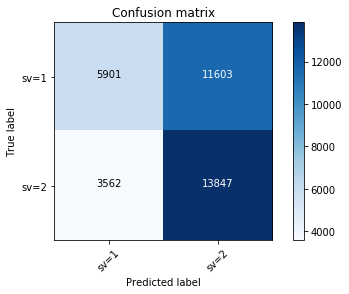

In [67]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat [0:5]

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sv=1','sv=2'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
k = 6

neighK6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK6
 
yhat = neighK6.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighK6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5400979585824239
Test set Accuracy:  0.5365909546587231


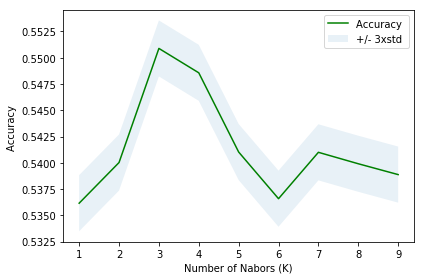

Best accuracy: 0.550883625010741 k= 3


In [45]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
#Modelling
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
predTree = Tree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))


[2 2 1 2 2]
[1 2 2 2 1]
Accuracy:  0.5613381834846619


In [68]:
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)


yhatDEC = Tree.predict(X)
DTJaccard = jaccard_similarity_score(y, yhatDEC)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

yhatSVM=clf.predict(X)
SVMJaccard = jaccard_similarity_score(y, yhatSVM)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)

yhatLOG = Lr.predict(X)
yhatLOGproba = Lr.predict_proba(X)
LogRJaccard = jaccard_similarity_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

Avg F1-score: 0.51
KNN Jaccard Score: 0.54
Avg F1-score: 0.53
Decision Tree Jaccard Score: 0.56
Avg F1-score: 0.54
SVM Jaccard score: 0.56
LogLoss: : 0.68
Avg F1-score: 0.5119
LOG Jaccard score: 0.5263
